In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv(r"C:\Users\KimKa\Desktop\Data Projects\Trending Movies Data Project\Trending_Movies.csv")
data.head(10)
#All necessery imports and reading the first 10 lines of the data


,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count
0,1098006,Fountain of Youth,Fountain of Youth,A treasure-hunting mastermind assembles a team...,False,en,221.1354,2025-05-19,6.900,105
1,1232546,Until Dawn,Until Dawn,One year after her sister Melanie mysteriously...,False,en,287.8015,2025-04-23,6.360,283
2,1001414,Fear Street: Prom Queen,Fear Street: Prom Queen,Who will be voted queen at Shadyside High's 19...,False,en,215.8355,2025-05-23,5.361,101
3,575265,Mission: Impossible - The Final Reckoning,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,False,en,325.1914,2025-05-17,7.026,253
4,574475,Final Destination Bloodlines,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",False,en,535.0346,2025-05-09,7.078,392
5,552524,Lilo & Stitch,Lilo & Stitch,The wildly funny and touching story of a lonel...,False,en,508.3123,2025-05-17,7.063,128
6,950387,A Minecraft Movie,A Minecraft Movie,Four misfits find themselves struggling with o...,False,en,694.9673,2025-03-31,6.527,1416
7,822119,Captain America: Brave New World,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,False,en,134.5154,2025-02-12,6.106,1894
8,896536,The Legend of Ochi,The Legend of Ochi,In a remote village on the island of Carpathia...,False,en,240.6930,2025-04-18,6.075,67
9,1233413,Sinners,Sinners,"Trying to leave their troubled lives behind, t...",False,en,111.2267,2025-04-16,7.600,767


In [281]:

data.drop_duplicates(subset='title',inplace=True)
#dropping any duplicate movies based on the title

In [282]:
data.info()
#checking for null values and inaccurate datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 9434 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9434 non-null   int64  
 1   title              9434 non-null   object 
 2   original_title     9434 non-null   object 
 3   overview           9189 non-null   object 
 4   adult              9434 non-null   bool   
 5   original_language  9434 non-null   object 
 6   popularity         9434 non-null   float64
 7   release_date       9295 non-null   object 
 8   vote_average       9434 non-null   float64
 9   vote_count         9434 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 746.2+ KB


In [283]:
data['release_date']=pd.to_datetime(data['release_date'])
data.info()
#converted 'release_date' column from object datatype to datetime

<class 'pandas.core.frame.DataFrame'>
Index: 9434 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9434 non-null   int64         
 1   title              9434 non-null   object        
 2   original_title     9434 non-null   object        
 3   overview           9189 non-null   object        
 4   adult              9434 non-null   bool          
 5   original_language  9434 non-null   object        
 6   popularity         9434 non-null   float64       
 7   release_date       9295 non-null   datetime64[ns]
 8   vote_average       9434 non-null   float64       
 9   vote_count         9434 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 746.2+ KB


In [284]:
data= data[data['release_date']<='2025-09-07']
#filtered data to only show movies that have already been released as of 09/07/2025


In [285]:
data.drop(columns=['original_title','overview'],inplace=True)
#removed the 'original_title' column and the 'overview' column


In [286]:
data.dropna(subset='release_date',inplace=True)
data.isnull().sum()
#removed all rows with no release date and checked to see if there are any other empty entries within the other columns

id                   0
title                0
adult                0
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [287]:
data[data['vote_count']>=1000].sort_values(by='vote_average', ascending=False).head(10)
#displayed the movies with more than 1000 votes(Engagement) that had highest voting average(Rating)

,id,title,adult,original_language,popularity,release_date,vote_average,vote_count
310,278,The Shawshank Redemption,False,en,35.7248,1994-09-23,8.710,28318
125,238,The Godfather,False,en,31.7735,1972-03-14,8.687,21456
596,240,The Godfather Part II,False,en,16.7490,1974-12-20,8.570,12964
1410,424,Schindler's List,False,en,17.2990,1993-12-15,8.565,16441
956,389,12 Angry Men,False,en,15.8763,1957-04-10,8.548,9132
933,497,The Green Mile,False,en,17.2486,1999-12-10,8.505,18101
153,129,Spirited Away,False,ja,22.0935,2001-07-20,8.500,17151
192,155,The Dark Knight,False,en,28.8404,2008-07-16,8.500,33867
129,496243,Parasite,False,ko,26.9119,2019-05-30,8.499,19066
173,680,Pulp Fiction,False,en,18.9840,1994-09-10,8.489,28679


In [288]:
breakdown= data['original_language'].value_counts().to_dict()
print(breakdown)
#grouped movies according to their language and counted them to see if any language other than english stands out


{'en': 5928, 'ja': 630, 'fr': 446, 'ko': 348, 'zh': 292, 'cn': 229, 'es': 194, 'de': 182, 'it': 173, 'tl': 85, 'hi': 84, 'ru': 74, 'pt': 52, 'id': 44, 'th': 38, 'nl': 35, 'sv': 33, 'no': 31, 'te': 30, 'tr': 30, 'pl': 27, 'da': 24, 'ta': 19, 'ar': 18, 'cs': 18, 'ml': 16, 'vi': 15, 'ro': 14, 'fa': 13, 'fi': 12, 'bn': 11, 'uk': 9, 'he': 6, 'pa': 5, 'et': 5, 'ms': 5, 'kk': 5, 'ca': 5, 'sr': 4, 'hu': 4, 'xx': 3, 'kn': 3, 'mi': 2, 'ur': 2, 'az': 2, 'bg': 2, 'el': 2, 'ga': 2, 'is': 2, 'mn': 2, 'mk': 2, 'uz': 2, 'yi': 1, 'lt': 1, 'af': 1, 'sh': 1, 'la': 1, 'gl': 1, 'st': 1, 'gu': 1, 'ka': 1, 'ho': 1, 'ht': 1, 'hr': 1, 'sq': 1, 'km': 1, 'my': 1, 'jv': 1, 'mr': 1, 'lv': 1, 'bs': 1}


In [289]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
#Created a function that grouped movies into a certain season based on their release month

data['season']=data['release_date'].dt.month.map(get_season)

#Got the release months of the movies and executed the function using map() then created a new column that stores the season of a movie 




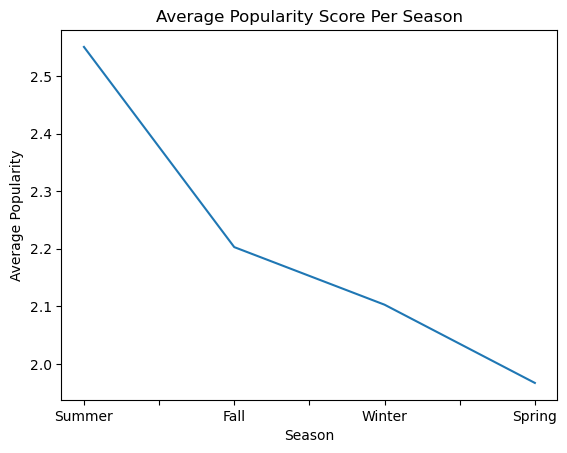

In [329]:
seasonalAveragePopularity=data.groupby(data['season'])['popularity'].median().sort_values(ascending=False)
seasonalAveragePopularity.plot(kind='line',ylabel='Average Popularity', xlabel='Season',title='Average Popularity Score Per Season')
plt.show()

#Grouped the movies based on their release season and returned the median popularity of movies in each season then plotted it on a line graph 

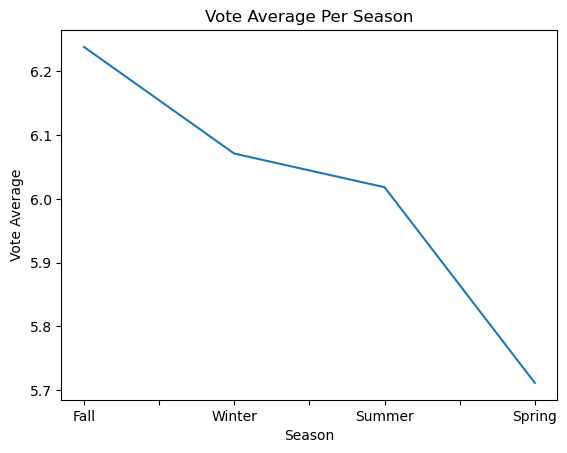

In [291]:
seasonalVoteAverage = data.groupby(data['season'])['vote_average'].mean().sort_values(ascending=False)
seasonalVoteAverage.plot(kind='line',ylabel='Vote Average',xlabel='Season',title='Vote Average Per Season')
plt.show()

#Grouped the movies based on their release season and returned the average rating of movies in each season then plotted it on a line graph 

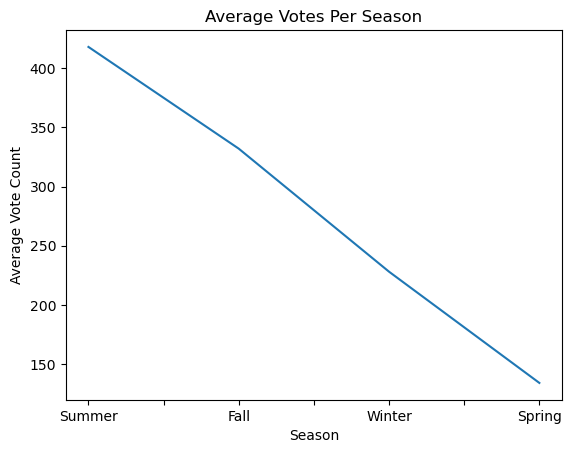

In [292]:
seasonalVoteAverage = data.groupby(data['season'])['vote_count'].median().sort_values(ascending=False)
seasonalVoteAverage.plot(kind='line',ylabel='Average Vote Count',xlabel='Season',title='Average Votes Per Season')
plt.show()

#Grouped the movies based on their release season and returned the median number of votes for movies in each season then plotted it on a line graph 

In [293]:
popularMovies=data[data['popularity']>=200]
flaggedMovies=popularMovies[popularMovies['vote_count']<1000]
flaggedMovies
#Got a list of 'highly popular' movies with a low level of engagement


,id,title,adult,original_language,popularity,release_date,vote_average,vote_count,season
0,1098006,Fountain of Youth,False,en,221.1354,2025-05-19,6.900,105,Spring
1,1232546,Until Dawn,False,en,287.8015,2025-04-23,6.360,283,Spring
2,1001414,Fear Street: Prom Queen,False,en,215.8355,2025-05-23,5.361,101,Spring
3,575265,Mission: Impossible - The Final Reckoning,False,en,325.1914,2025-05-17,7.026,253,Spring
4,574475,Final Destination Bloodlines,False,en,535.0346,2025-05-09,7.078,392,Spring
5,552524,Lilo & Stitch,False,en,508.3123,2025-05-17,7.063,128,Spring
8,896536,The Legend of Ochi,False,en,240.6930,2025-04-18,6.075,67,Spring
12,447273,Snow White,False,en,268.7116,2025-03-12,4.302,925,Spring
15,1197306,A Working Man,False,en,314.9315,2025-03-26,6.674,965,Spring
34,1241436,Warfare,False,en,262.0183,2025-04-09,7.226,419,Spring


In [294]:
def movie_era(year):
    if 1900 <= year <= 1930:
        return 'Silent Era'
    elif 1930 <= year <= 1960:
        return 'Golden Age'
    elif 1960 <= year <= 1980:
        return 'New Hollywood'
    elif 1980 <= year <= 2010:
        return 'Blockbuster Era'
    else: return 'Modern Era'
#Created a function that grouped movies into a certain era based on their release year

data['Era']=data['release_date'].dt.year.map(movie_era)
#Got the release year of the movies and executed the function using map() then created a new column that stores the era of a movie 
data
    


,id,title,adult,original_language,popularity,release_date,vote_average,vote_count,season,Era
0,1098006,Fountain of Youth,False,en,221.1354,2025-05-19,6.900,105,Spring,Modern Era
1,1232546,Until Dawn,False,en,287.8015,2025-04-23,6.360,283,Spring,Modern Era
2,1001414,Fear Street: Prom Queen,False,en,215.8355,2025-05-23,5.361,101,Spring,Modern Era
3,575265,Mission: Impossible - The Final Reckoning,False,en,325.1914,2025-05-17,7.026,253,Spring,Modern Era
4,574475,Final Destination Bloodlines,False,en,535.0346,2025-05-09,7.078,392,Spring,Modern Era
...,...,...,...,...,...,...,...,...,...,...
9994,1465284,我是拳手,False,zh,0.2425,2025-04-16,0.000,0,Spring,Modern Era
9995,1465248,TNA Rebellion 2025,False,en,0.6146,2025-04-27,7.000,1,Spring,Modern Era
9996,1465243,I Am Legend -Alternate,False,en,0.1985,2007-01-01,0.000,0,Winter,Blockbuster Era
9997,1465066,El Titán: The Adrián González Story,False,en,0.1201,2023-06-14,0.000,0,Summer,Modern Era


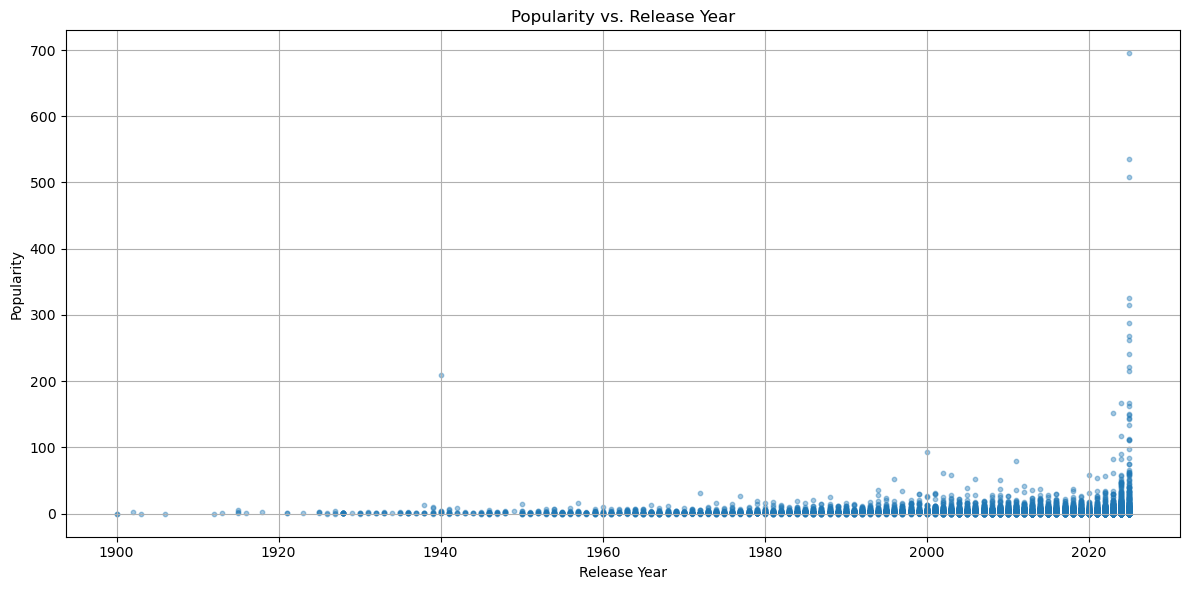

In [295]:
data['year'] = data['release_date'].dt.year
plt.figure(figsize=(12, 6))
plt.scatter(data['year'], data['popularity'], alpha=0.4, s=10)
plt.title('Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()
#Checked to see if any old movies still stand out in terms of popularity in comparison with movies in other eras using a scatterplot


In [296]:
data.loc[(data['release_date'].dt.year == 1940) & (data['popularity'] > 200), ['title','popularity']]
#Found the old movie that stood out on the scatterplot

,title,popularity
3822,The Great Dictator,208.7178


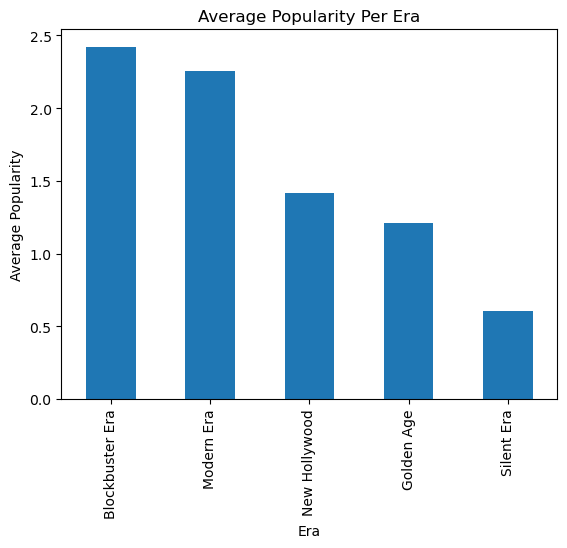

In [297]:
avgPopularity = data.groupby(data['Era'])['popularity'].median().sort_values(ascending=False)
avgPopularity.plot(kind='bar', xlabel='Era', ylabel='Average Popularity', title='Average Popularity Per Era')
plt.show()
#Created a bar graph that shows the average popularity of the different eras

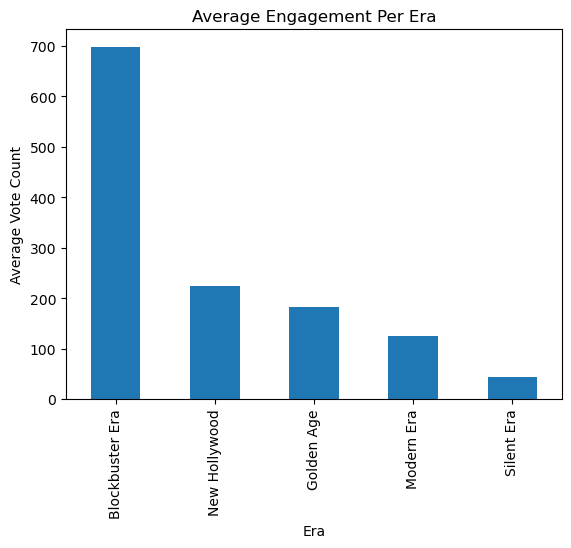

In [298]:
avgPopularity = data.groupby(data['Era'])['vote_count'].median().sort_values(ascending=False)
avgPopularity.plot(kind='bar', xlabel='Era', ylabel='Average Vote Count', title='Average Engagement Per Era')
plt.show()
#Created a bar graphs that shows the amount of engagement in different eras

In [325]:
data[['popularity','vote_average','vote_count']].corr()
#Checked the correlation between popularity, rating and engagement

,popularity,vote_average,vote_count
popularity,1.000000,0.093214,0.179802
vote_average,0.093214,1.000000,0.249742
vote_count,0.179802,0.249742,1.000000
